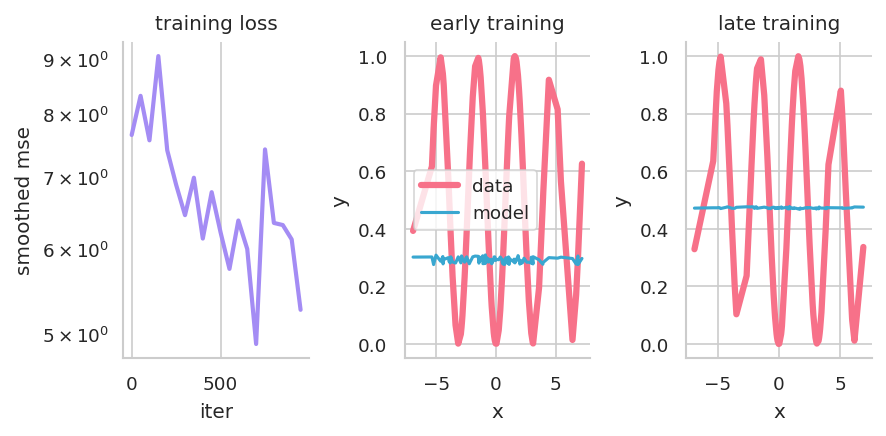

(1000, 4)


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

with open("data.txt", "r") as f:
    lines = f.readlines()

def split(line):
    words = line.split(" ")
    to_return = [float(c) for c in words if c != "\n"]
    return to_return

data = np.asarray(list(map(split, lines)))

print_every = 50
mse = np.convolve(data[:,0], np.ones(print_every), mode="valid")

def plot_xy(x, y, y_hat, ax, colors=["C0", "C1"]):
    idx = np.argsort(x)
    x, y, y_hat = x[idx], y[idx], y_hat[idx]
    ax.plot(x, y, "-", label="data", color=colors[0], linewidth=3)
    ax.plot(x, y_hat,"-", label="model", color=colors[1], linewidth=1.5)

x, y, y_hat = data[:,1], data[:,2], data[:,3]
nth = 100

with sns.plotting_context("paper"):
    colors_hls = sns.color_palette("husl",8)
    colors = [colors_hls[0], colors_hls[5]]

    fig, ax = plt.subplots(1,3, figsize=(6,3), dpi=150)
    ax[0].plot(np.arange(0, len(mse), print_every), mse[::print_every], color=colors_hls[6],linewidth=2)
    ax[0].set(xlabel="iter", ylabel="smoothed mse", title="training loss", yscale="log")

    plot_xy(x[:nth], y[:nth], y_hat[:nth], ax[1], colors=colors)
    ax[1].set(xlabel="x", ylabel="y", title="early training", ylim=(-.05, 1.05))
    ax[1].legend()

    plot_xy(x[-nth:],y[-nth:],y_hat[-nth:], ax[2], colors=colors)
    ax[2].set(xlabel="x", ylabel="y", title="late training", ylim=(-.05, 1.05))
    fig.tight_layout()
    sns.despine()
    plt.show()

print(data.shape)